In [1]:
# Instalando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando o base de dados csv
df = pd.read_csv(r'Retail_sales.csv')

In [3]:
# Verificando as colunas da base
df.columns

Index(['Store ID', 'Product ID', 'Date', 'Units Sold', 'Sales Revenue (USD)',
       'Discount Percentage', 'Marketing Spend (USD)', 'Store Location',
       'Product Category', 'Day of the Week', 'Holiday Effect'],
      dtype='object')

In [4]:
# Passando os nomes das colunas para lower case
df.columns = df.columns.str.lower()

print(df.columns)

Index(['store id', 'product id', 'date', 'units sold', 'sales revenue (usd)',
       'discount percentage', 'marketing spend (usd)', 'store location',
       'product category', 'day of the week', 'holiday effect'],
      dtype='object')


In [5]:
# Verificando valores nulos na base
df.isnull().sum()

store id                 0
product id               0
date                     0
units sold               0
sales revenue (usd)      0
discount percentage      0
marketing spend (usd)    0
store location           0
product category         0
day of the week          0
holiday effect           0
dtype: int64

* Sem nulos para tratar

In [6]:
# Verificando o tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   store id               30000 non-null  object 
 1   product id             30000 non-null  int64  
 2   date                   30000 non-null  object 
 3   units sold             30000 non-null  int64  
 4   sales revenue (usd)    30000 non-null  float64
 5   discount percentage    30000 non-null  int64  
 6   marketing spend (usd)  30000 non-null  int64  
 7   store location         30000 non-null  object 
 8   product category       30000 non-null  object 
 9   day of the week        30000 non-null  object 
 10  holiday effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [7]:
# Verificando a amostra de valor de cada coluna
print(df.head)

<bound method NDFrame.head of          store id  product id        date  units sold  sales revenue (usd)  \
0      Spearsland    52372247  2022-01-01           9              2741.69   
1      Spearsland    52372247  2022-01-02           7              2665.53   
2      Spearsland    52372247  2022-01-03           1               380.79   
3      Spearsland    52372247  2022-01-04           4              1523.16   
4      Spearsland    52372247  2022-01-05           2               761.58   
...           ...         ...         ...         ...                  ...   
29995  Spearsland    50239115  2022-01-25           5              2501.15   
29996  Spearsland    50239115  2022-01-26           3              1500.69   
29997  Spearsland    50239115  2022-01-27           6              3001.38   
29998  Spearsland    50239115  2022-01-28           5              2501.15   
29999  Spearsland    50239115  2022-01-29           3              1425.66   

       discount percentage  marke

Formatando o Dataframe

In [8]:
# Convertendo a coluna de data para o formato de data
df['date'] = pd.to_datetime(df['date'], format= 'mixed')

print(df['date'].dtype)

datetime64[ns]


In [9]:
# Verificando valores duplicados
valores_duplicados = df.duplicated().sum()
print(f"Valores duplicados: {valores_duplicados}")

Valores duplicados: 0


In [10]:
# Verificando forma do dataframe
print(f"Dataframe com {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataframe com 30000 linhas e 11 colunas.


Analisando os dados

In [11]:
# Receita total
print(f"Receita total de $ {df['sales revenue (usd)'].sum():,}")


Receita total de $ 82,485,287.78


In [12]:
# Receita por ano
df_2022 = df.query('date.dt.year == 2022')
df_2023 = df.query('date.dt.year == 2023')
df_2024 = df.query('date.dt.year == 2024')

print(f"Receita total em 2022: $ {df_2022['sales revenue (usd)'].sum():,}")
print(f"Receita total em 2023: $ {df_2023['sales revenue (usd)'].sum():,}")
print(f"Receita total em 2024: $ {df_2024['sales revenue (usd)'].sum():,}")

Receita total em 2022: $ 41,204,926.9
Receita total em 2023: $ 41,199,686.01
Receita total em 2024: $ 80,674.87


* Como 2024 possui um resultado muito abaixo, já que o ano ainda está em andamento, o DataFrame utilizado para análise será de 2023, que é o DataFrame completo mais recente.

In [13]:
# Correlação
correlação = df_2023[['units sold', 'sales revenue (usd)', 'discount percentage', 'marketing spend (usd)']].corr()
correlação

,units sold,sales revenue (usd),discount percentage,marketing spend (usd)
units sold,1.000000,0.618951,-0.001737,-0.007954
sales revenue (usd),0.618951,1.000000,-0.062545,-0.001378
discount percentage,-0.001737,-0.062545,1.000000,-0.014877
marketing spend (usd),-0.007954,-0.001378,-0.014877,1.000000


* A correlação relevante está apenas entre receita e unidades vendidas.

Text(0.5, 1.0, 'Mapa de correlação')

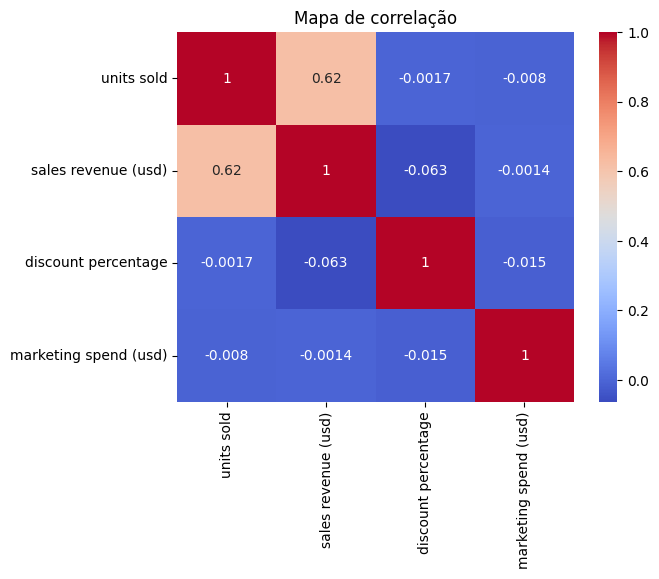

In [14]:
# Mapa de calor da correlação
sns.heatmap(correlação, annot= True, cmap= 'coolwarm')
plt.title('Mapa de correlação')

* No mapa de calor acima temos a correlação de forma mais visual.

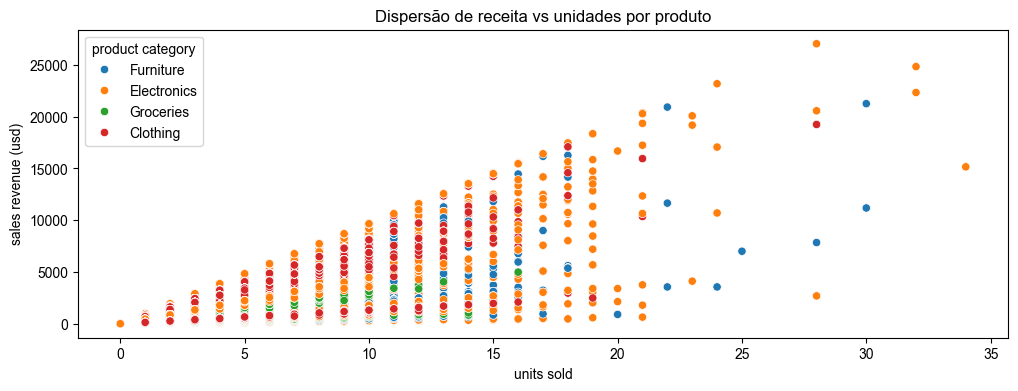

In [15]:
# Dispersão de receita vs unidades por produto
plt.figure(figsize=[12,4])
sns.scatterplot(x='units sold', y='sales revenue (usd)', hue='product category', data= df_2023)
sns.set_style('darkgrid')
plt.title('Dispersão de receita vs unidades por produto')
plt.show()

* Para entender melhor a correlação entre receita e unidades, temos acima um gráfico de dispersão com a relação receita vs unidades divida por categoria de produto, mostrando uma grande relevância dos eletrônicos na receita.

In [16]:
# Média de receita e unidades por categoria de produto
agrupamento_cat = df_2023.groupby('product category')
media_agrupamento_cat = agrupamento_cat[['sales revenue (usd)', 'units sold']].mean()

media_agrupamento_cat

,sales revenue (usd),units sold
product category,,
Clothing,3016.292703,5.832572
Electronics,3677.622137,7.072229
Furniture,2410.750788,6.226133
Groceries,1741.951750,5.213014


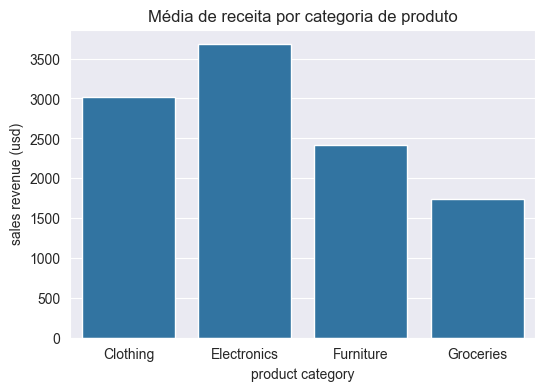

In [17]:
# Média de receita por categoria de produto
plt.figure(figsize=[6,4])
sns.barplot(x='product category', y='sales revenue (usd)', data=media_agrupamento_cat)
sns.set_style("darkgrid")
plt.title('Média de receita por categoria de produto')

plt.show()

* O gráfico acima mostra a categoria eletrônicos como a que gera mais receita, seguida de vestimenta.

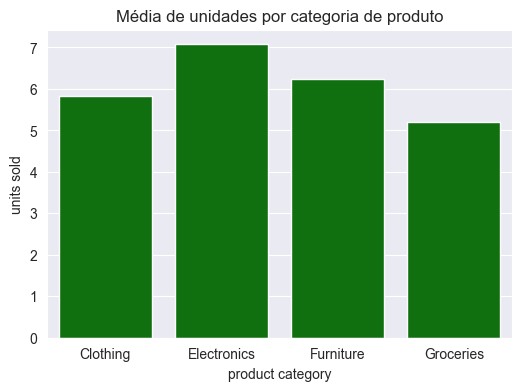

In [18]:
# Média de unidades por categoria de produto
plt.figure(figsize=[6,4])
sns.barplot(x='product category', y='units sold', data=media_agrupamento_cat, color= 'green')
sns.set_style("darkgrid")
plt.title('Média de unidades por categoria de produto')

plt.show()

* Nas unidades temos um alteração na ordem de relevância, com a categoria mobiliário superando a categoria vestimenta, o que nos indica que os itens de vestimenta são mais rentáveis que os itens mobiliários.

In [19]:
# Média de vendas por dia da semana e feriados
agrupamento_dh = df_2023.groupby(['day of the week', 'holiday effect'])
media_agrupamento_dh = agrupamento_dh[['sales revenue (usd)', 'units sold']].mean()

print(media_agrupamento_dh)

                                sales revenue (usd)  units sold
day of the week holiday effect                                 
Friday          False                   2624.744357    5.894787
                True                    5771.406341   12.634146
Monday          False                   2600.207049    5.753228
                True                    5823.228780   13.317073
Saturday        False                   3068.754273    6.928705
Sunday          False                   3062.577023    6.865163
Thursday        False                   2615.602294    5.911820
Tuesday         False                   2602.504508    5.788462
Wednesday       False                   2568.651454    5.752814


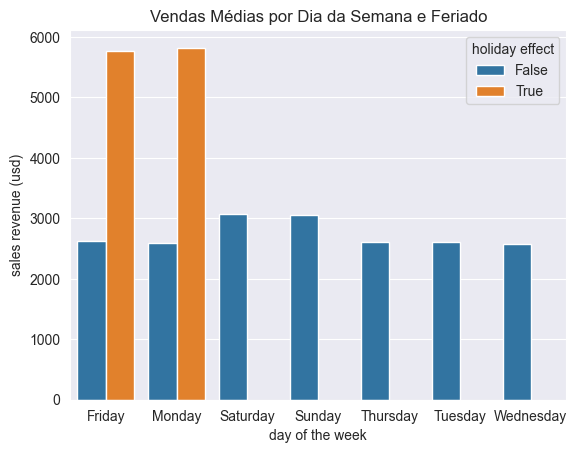

In [20]:
# Média de vendas por dia da semana e feriados
media_agrupamento_dh = media_agrupamento_dh.reset_index()

sns.barplot(x='day of the week', y='sales revenue (usd)', hue='holiday effect', data=media_agrupamento_dh)
plt.title('Vendas Médias por Dia da Semana e Feriado')
plt.show()

* No gráfico acima vemos que a média de vendas em feriados na sexta e na segunda é consideravelmente maior. É interessante olhar para a época do ano, quais feriados mais rentáveis e as categorias de produto mais relevantes.

In [21]:
# Total de vendas nas 20 lojas com maior resultado
agrupamento_store = df_2023.groupby('store location')
agrupamento_sales = agrupamento_store[['sales revenue (usd)', 'units sold']].sum()

top_20_stores = agrupamento_sales.sort_values(by= 'sales revenue (usd)', ascending= False).head(20)
top_20_stores


,sales revenue (usd),units sold
store location,,
Congo,312523.72,763
Korea,256931.05,678
Denmark,256868.44,500
Benin,251652.93,535
Uganda,242117.68,461
Tonga,233279.66,517
Heard Island and McDonald Islands,230877.70,442
Western Sahara,225887.61,483
Guinea-Bissau,221709.41,445


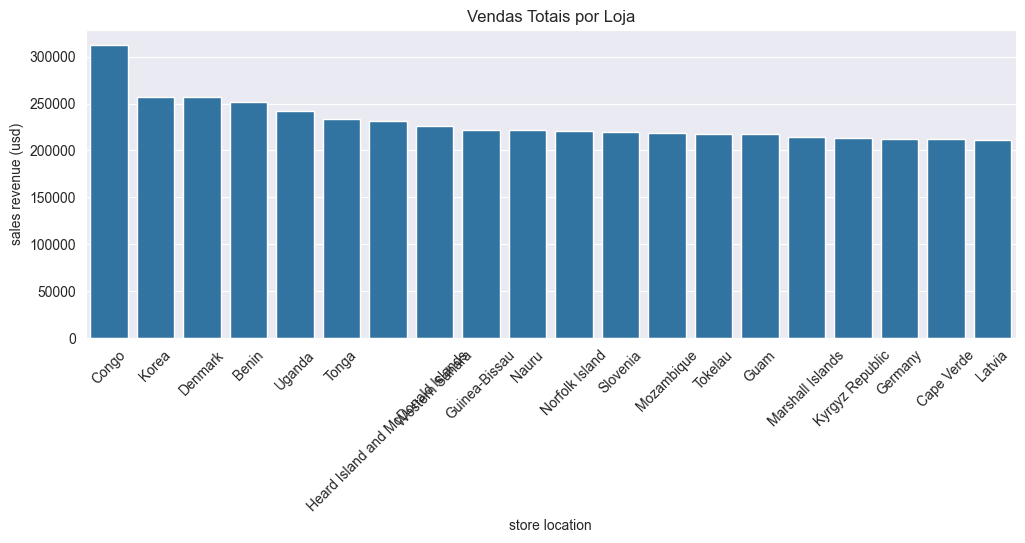

In [22]:
# Top 20 lojas em receita
plt.figure(figsize= [12,4])
sns.barplot(x= top_20_stores.index, y='sales revenue (usd)', data=top_20_stores)
plt.title('Vendas Totais por Loja')
plt.xticks(rotation=45)
plt.show()

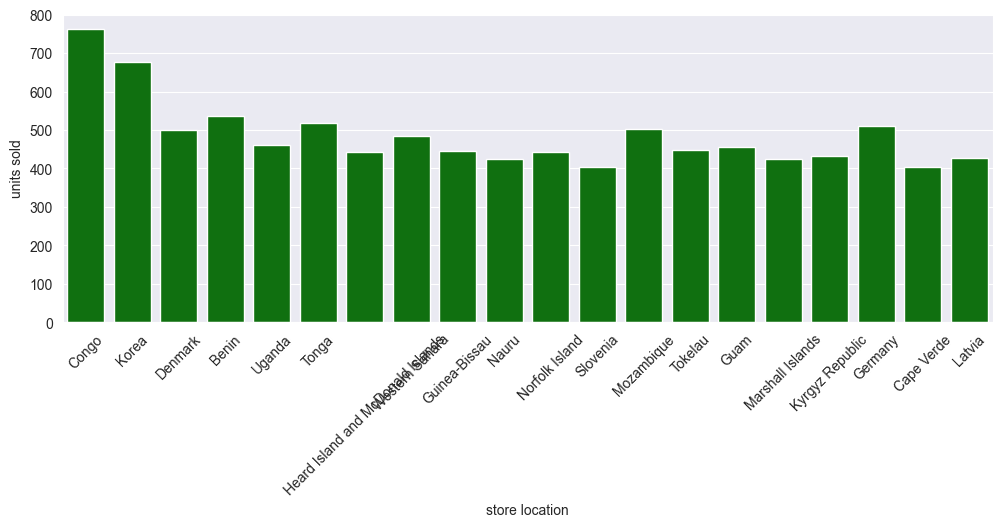

In [23]:
# Top 20 lojas em unidades
plt.figure(figsize= [12,4])
sns.barplot(x= top_20_stores.index, y='units sold', data= top_20_stores, color='green')
sns.set_style("darkgrid")
plt.xticks(rotation=45)

plt.show()

* No gráfico acima vemos que as lojas mais rentáveis nem sempre possuem os maiores volumes em unidades vendidas, isso se dá novamente pelas diferenças em quantidades de categorias de produto especificas. É interessante análisar os resultados das lojas por categoria de produto.